In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap

In [71]:
#import processed data
df = pd.read_csv('E:\Projects\canadacharities\data\interim\charity_data.csv')

#import data dictionary
data_dic = pd.read_csv(r'E:\Projects\canadacharities\data\external\data_dictionary.csv')

## Class distribution

What is the revoked/registered split?

In [4]:
df2 = df.reset_index().groupby('Status').size().to_frame('count')
df2['percentage'] = round(df2['count'] / len(df), 3)
print (df2)

            count  percentage
Status                       
Registered  72252       0.983
Revoked      1239       0.017


<b>Less than 2% of 73.5K charities who filed information with CRA in 2018 fiscal year had their charity status revoked between 2018-2020.</b>

## Plotting

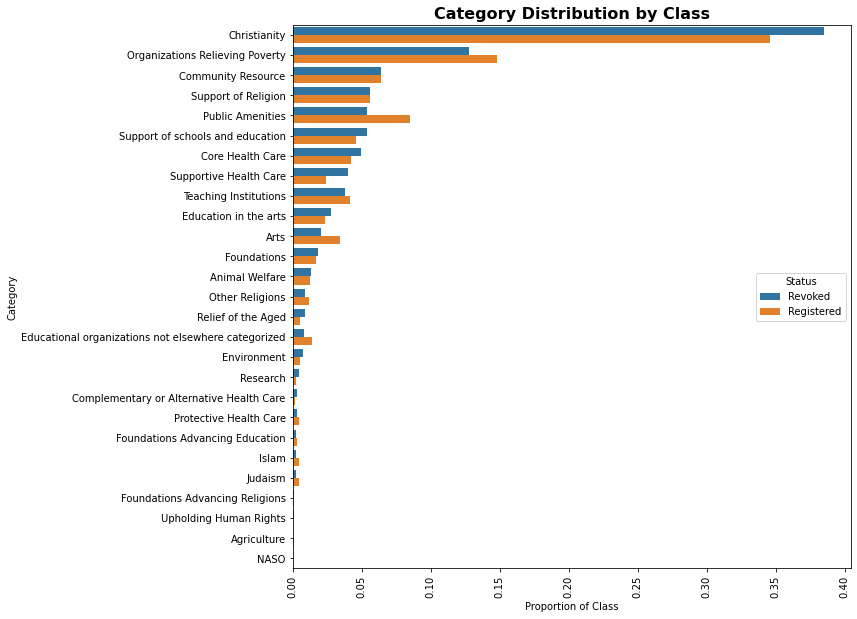

In [4]:
plt.figure(figsize=[10,10])
cat_df = df.groupby(['Status','Category'])['BN/Registration Number'].agg(['count'])
cat_df['category_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
cat_df = cat_df['category_perc'].reset_index().sort_values(['Status', 'category_perc'], ascending=False)

sns.barplot(x='category_perc', y='Category', hue='Status', data=cat_df)
plt.xticks(rotation=90)
plt.ylabel('Category')
plt.xlabel('Proportion of Class')
plt.title('Category Distribution by Class', fontsize = 16, fontweight='bold')
plt.show();

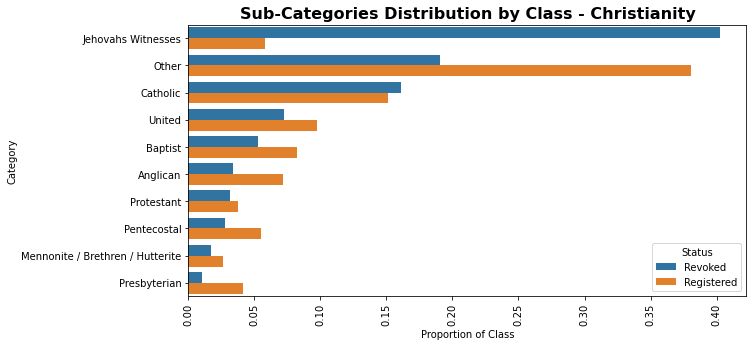

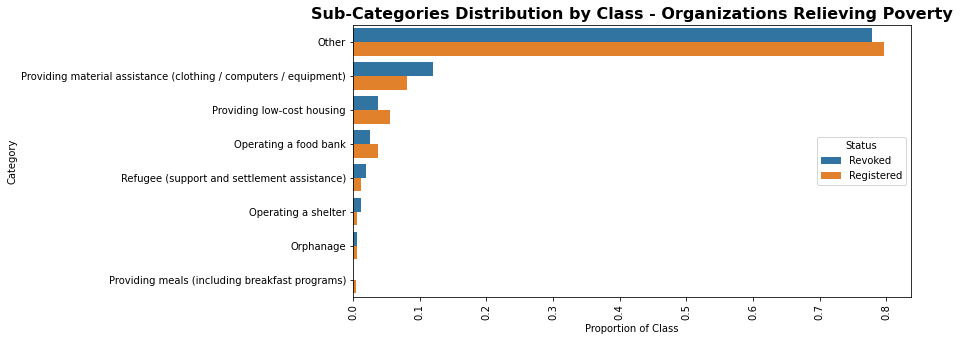

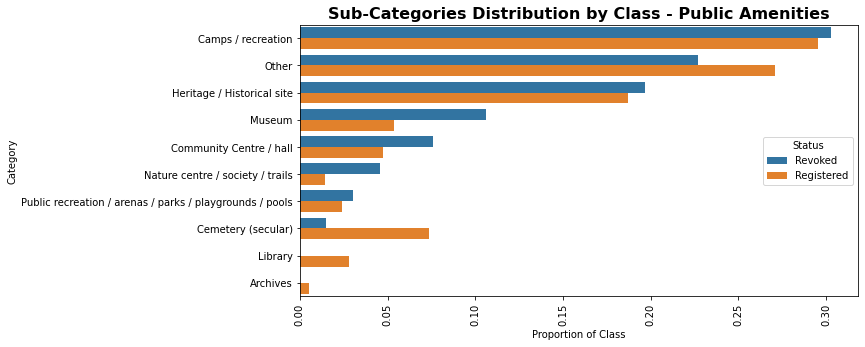

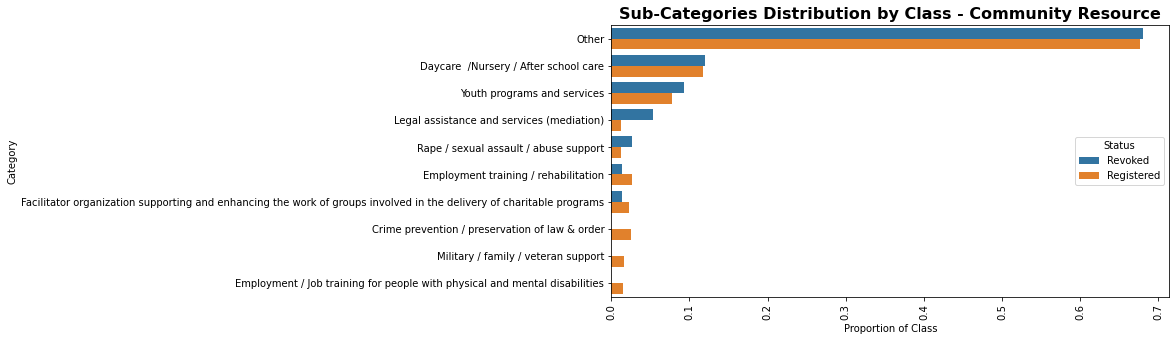

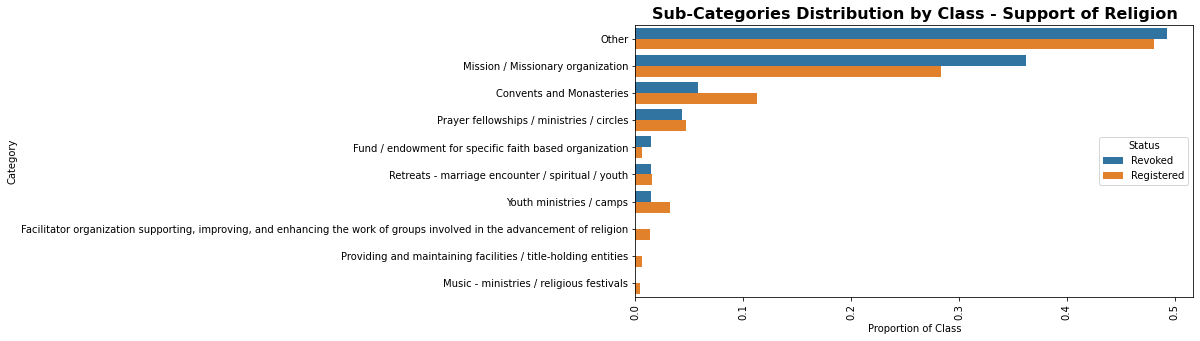

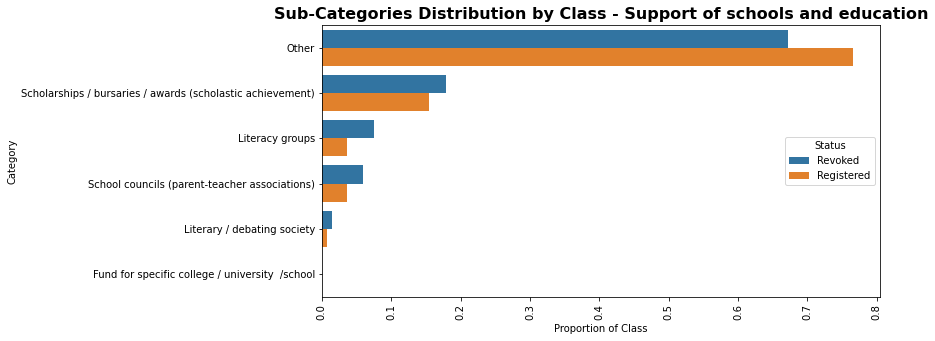

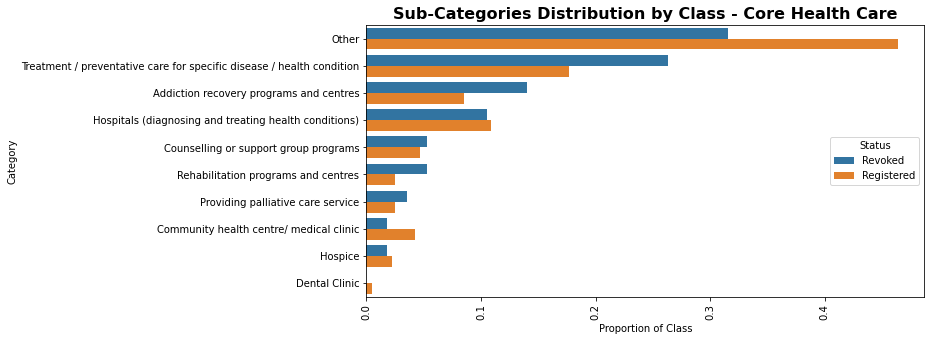

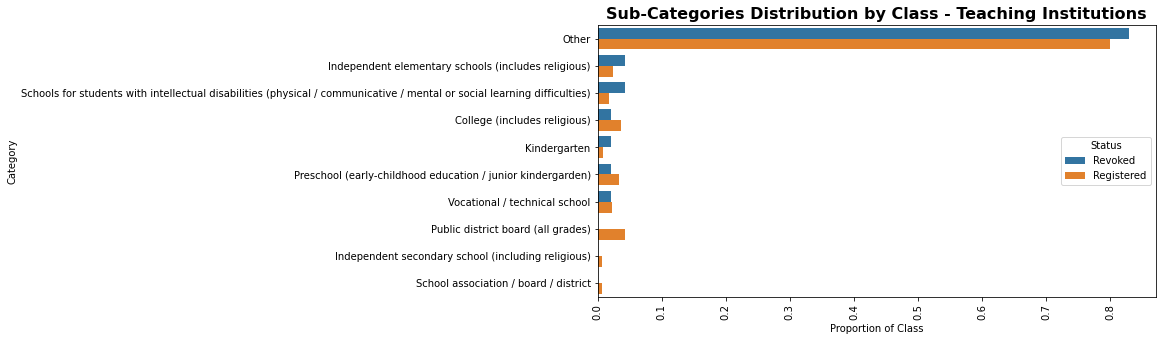

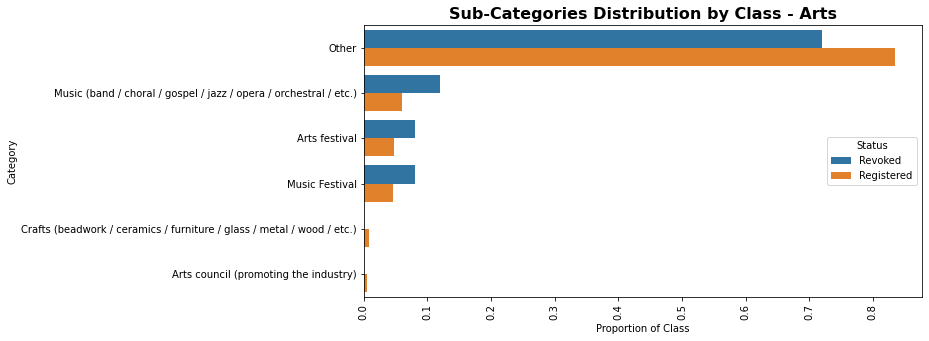

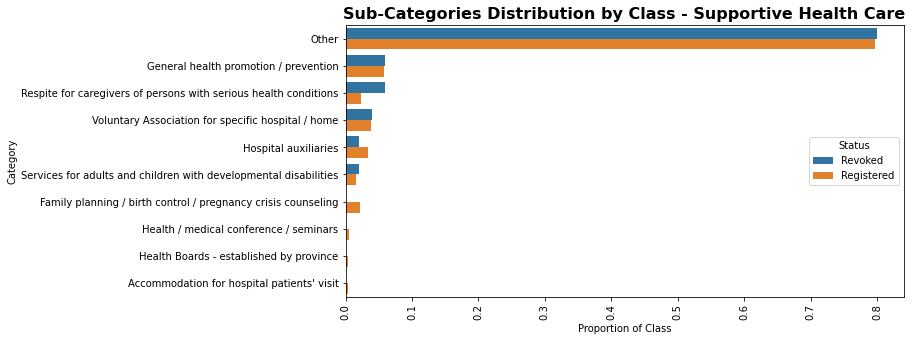

In [146]:
top_categories = df['Category'].value_counts(dropna=False)[:10].index.tolist()

for category in top_categories:
    cat_df = df.loc[df['Category']==category, :] #filter for category data
    top_subcategories = cat_df['Sub-Category'].value_counts(dropna=False)[:10].index.tolist()
    cat_df = cat_df.loc[cat_df['Sub-Category'].isin(top_subcategories), :]
    
    plt.figure(figsize=[10,5])
    cat_df = cat_df.groupby(['Status','Sub-Category'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='Sub-Category', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('Category')
    plt.xlabel('Proportion of Class')
    plt.title('Sub-Categories Distribution by Class - {}'.format(category), fontsize = 16, fontweight='bold')
    plt.show();

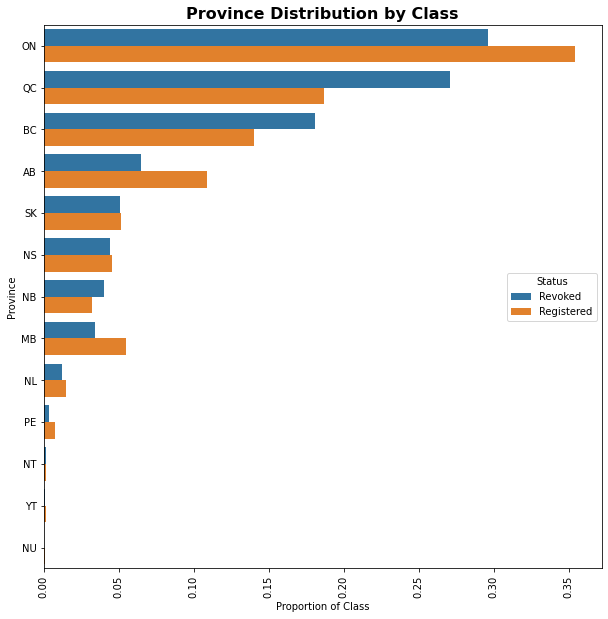

In [6]:
plt.figure(figsize=[10,10])
canada_provinces = ['ON', 'QC', 'BC', 'AB', 'SK', 'NS', 'NB', 'MB', 'NL', 'PE', 'NT', 'YT', 'NU']

#filter for Canada provinced
cat_df = df.loc[df['Province'].isin(canada_provinces), :]

cat_df = cat_df.groupby(['Status','Province'])['BN/Registration Number'].agg(['count'])
cat_df['category_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
cat_df = cat_df['category_perc'].reset_index().sort_values(['Status', 'category_perc'], ascending=False)

sns.barplot(x='category_perc', y='Province', hue='Status', data=cat_df)
plt.xticks(rotation=90)
plt.ylabel('Province')
plt.xlabel('Proportion of Class')
plt.title('Province Distribution by Class', fontsize = 16, fontweight='bold')
plt.show();

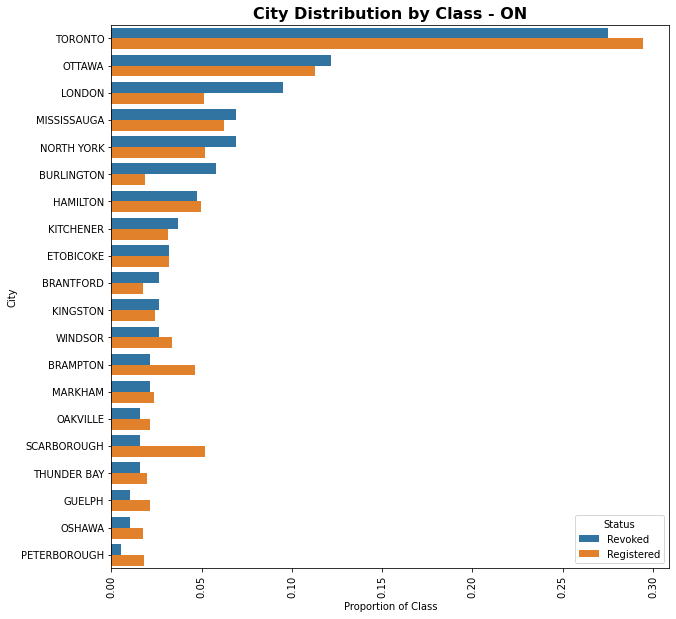

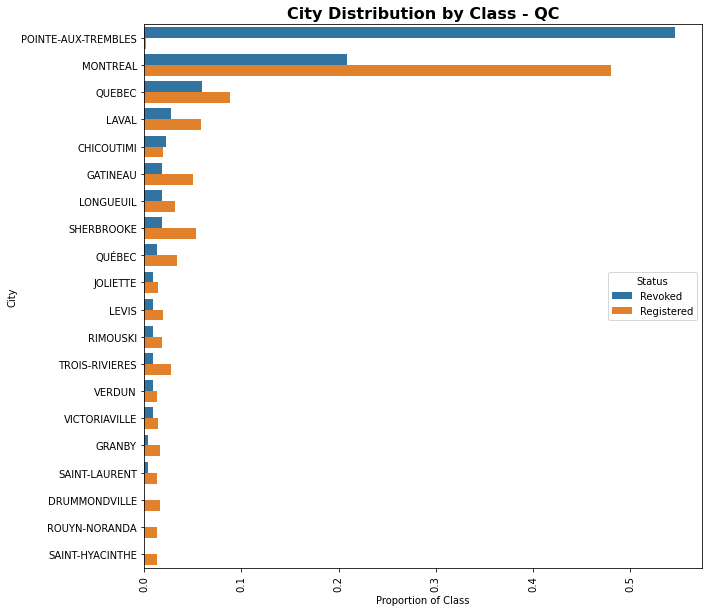

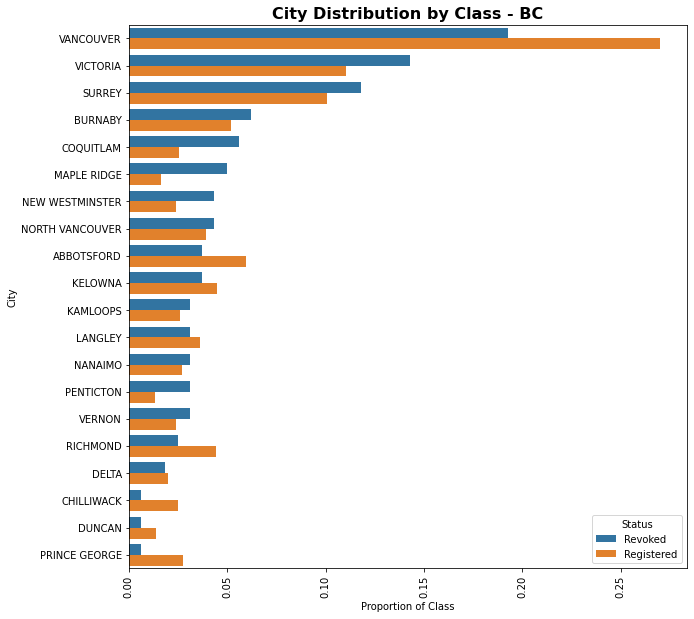

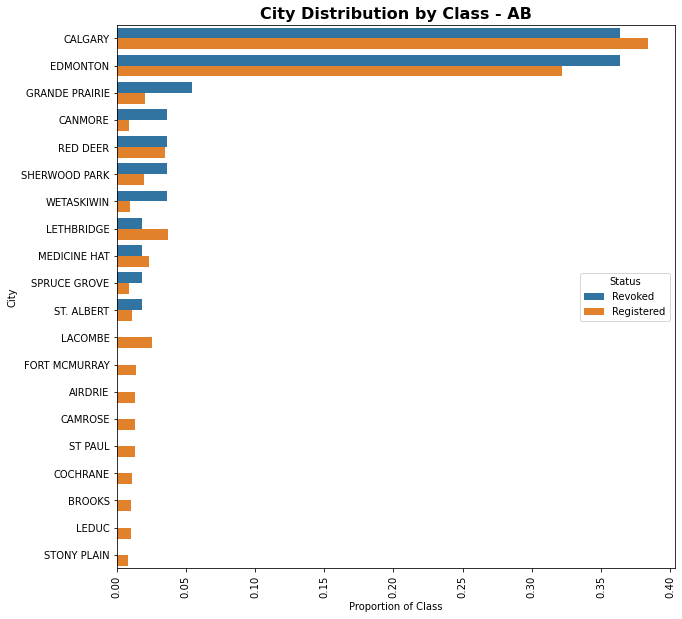

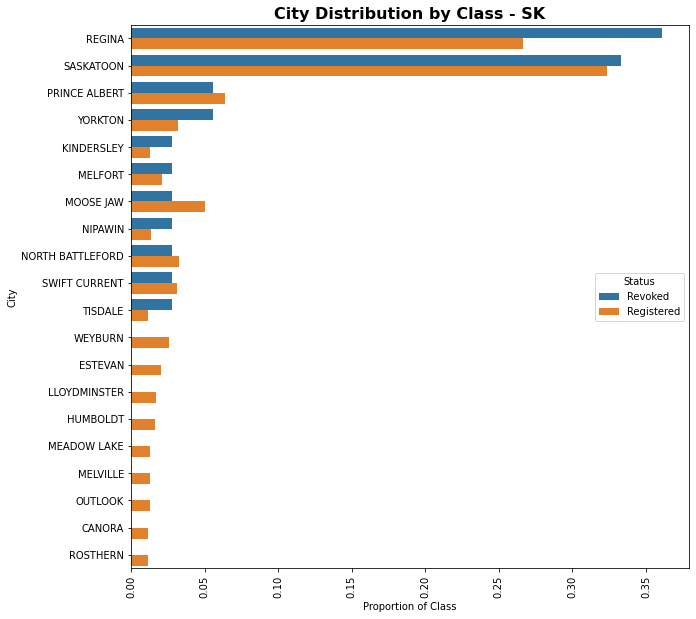

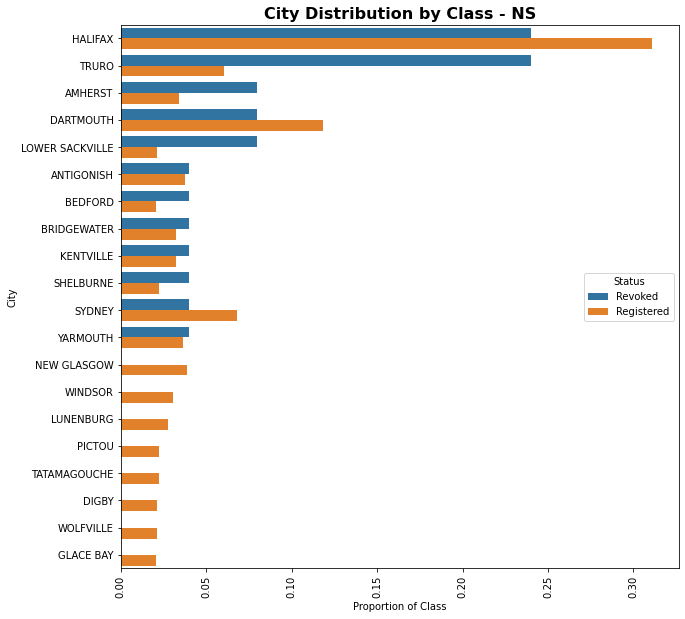

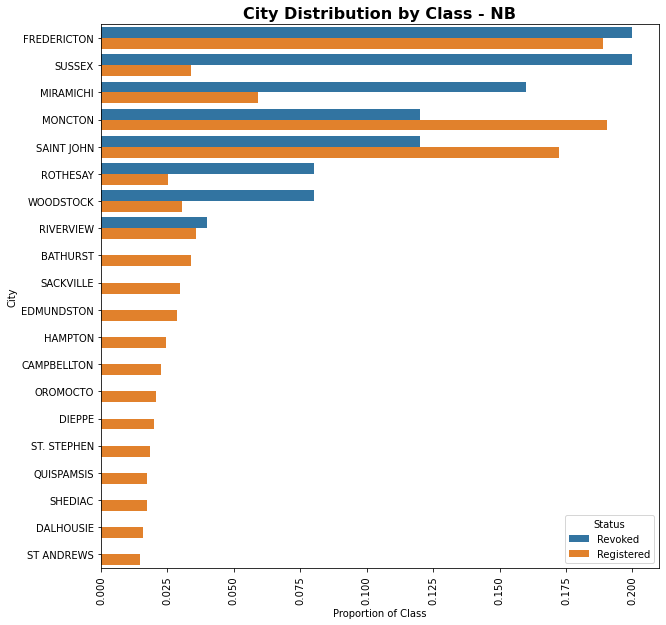

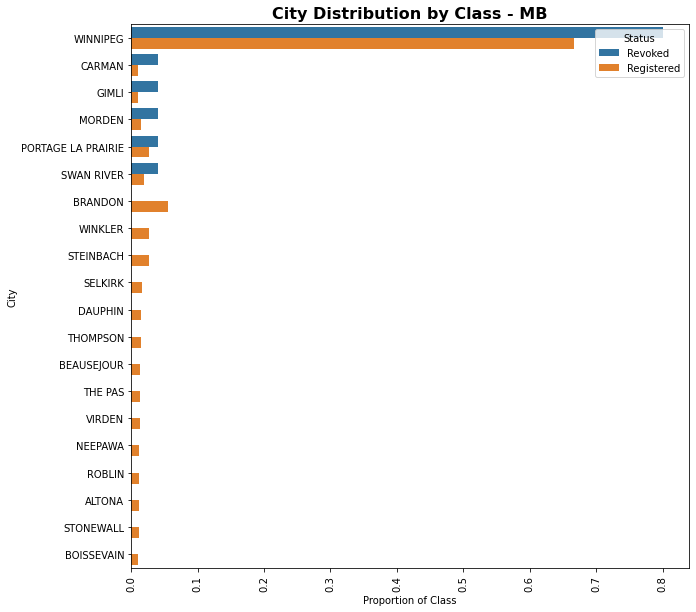

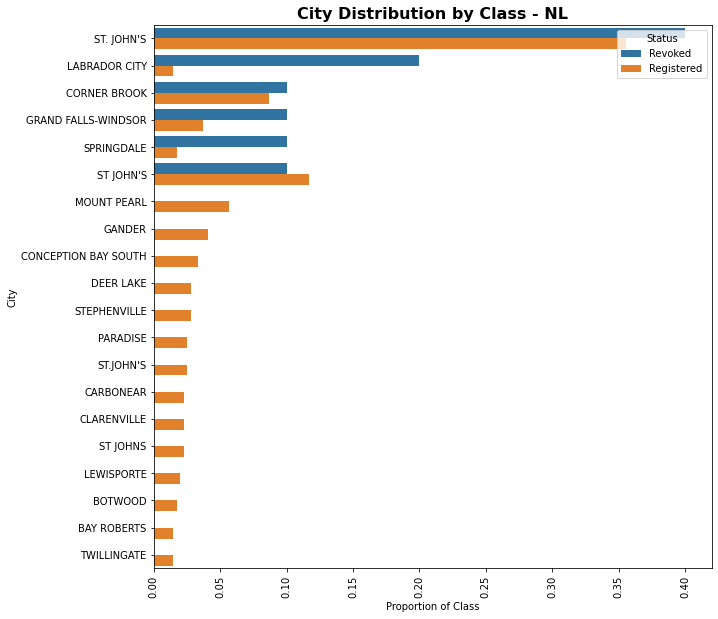

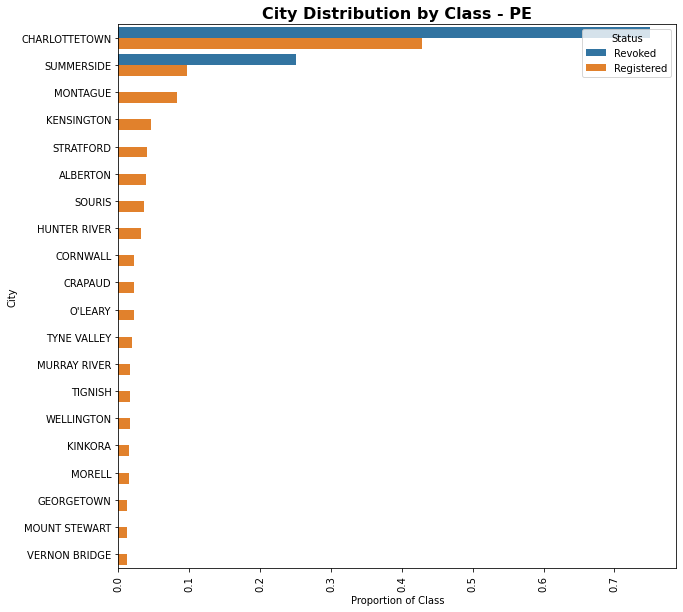

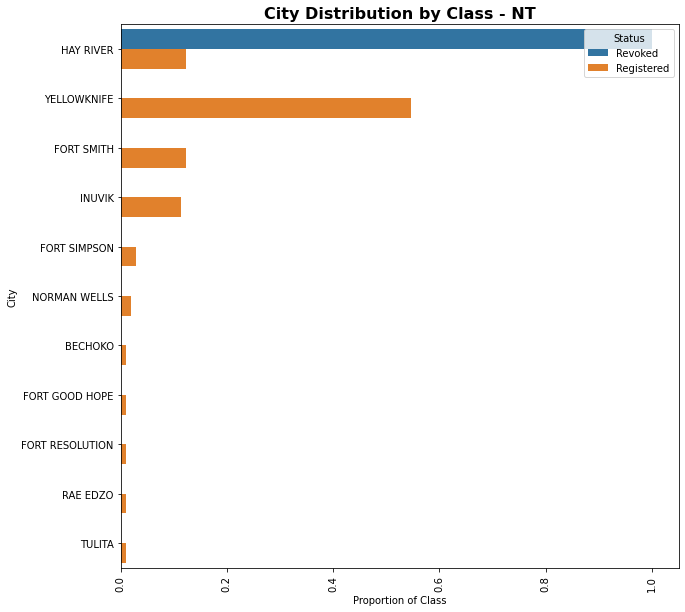

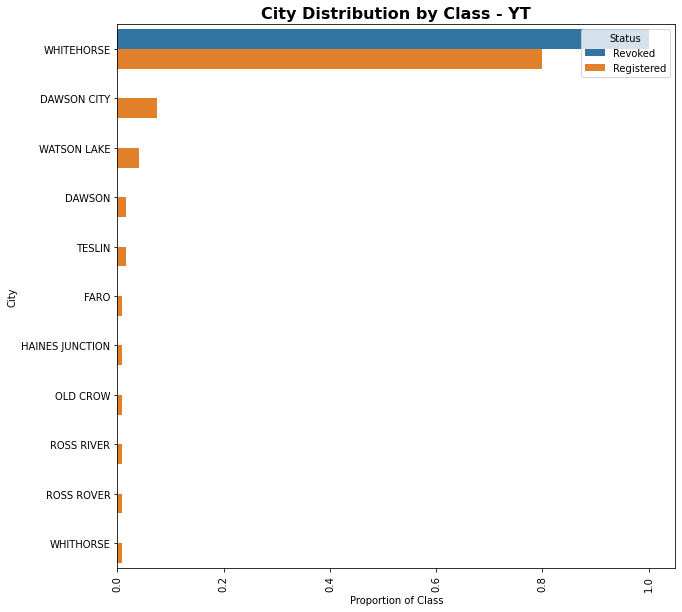

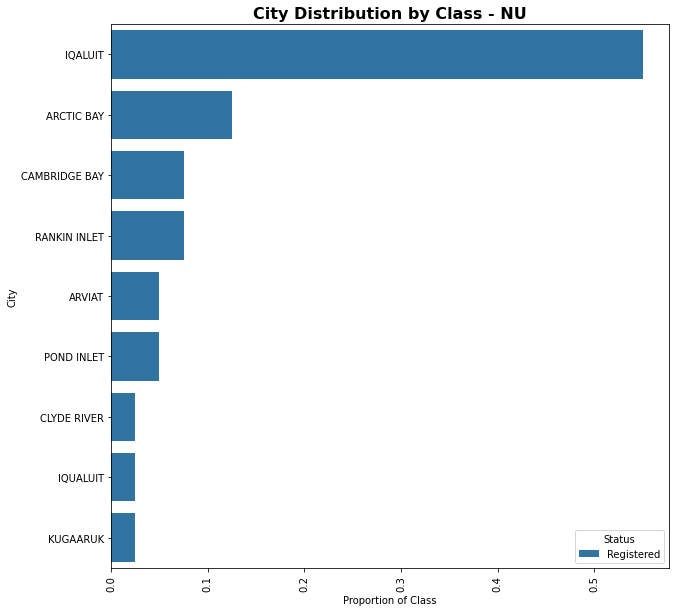

In [7]:
for province in canada_provinces:
    cat_df = df.loc[df['Province'] == province, :] #filter for province data
    top_cities = cat_df['City'].value_counts(dropna=False)[:20].index.tolist()
    cat_df = cat_df.loc[cat_df['City'].isin(top_cities), :]
    
    plt.figure(figsize=[10,10])
    cat_df = cat_df.groupby(['Status','City'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='City', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('City')
    plt.xlabel('Proportion of Class')
    plt.title('City Distribution by Class - {}'.format(province), fontsize = 16, fontweight='bold')
    plt.show();

#### Program Areas

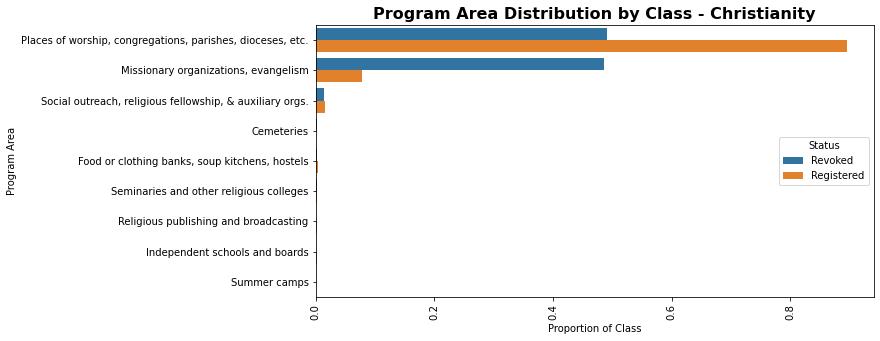

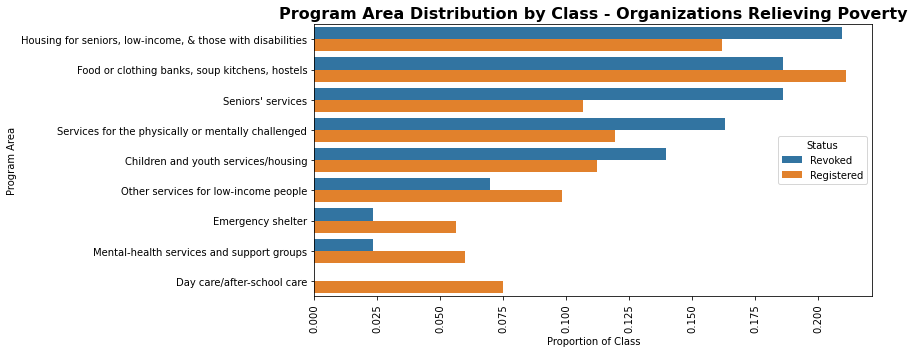

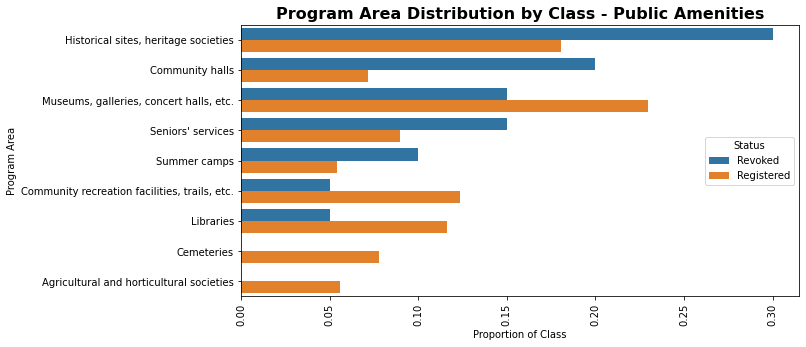

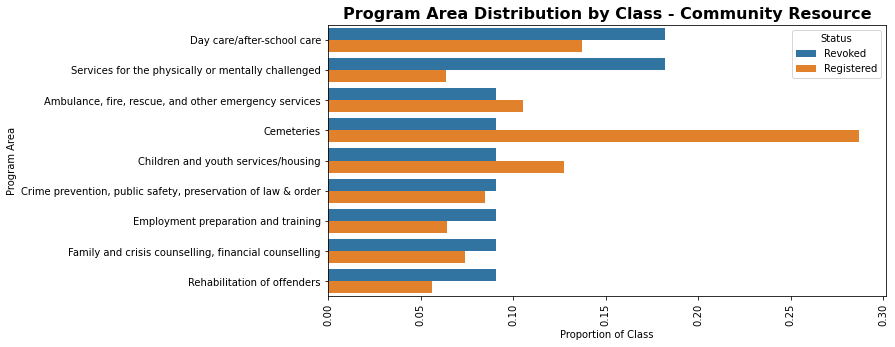

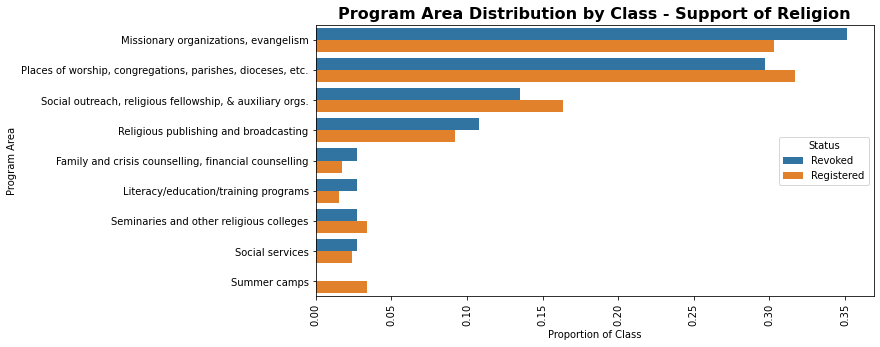

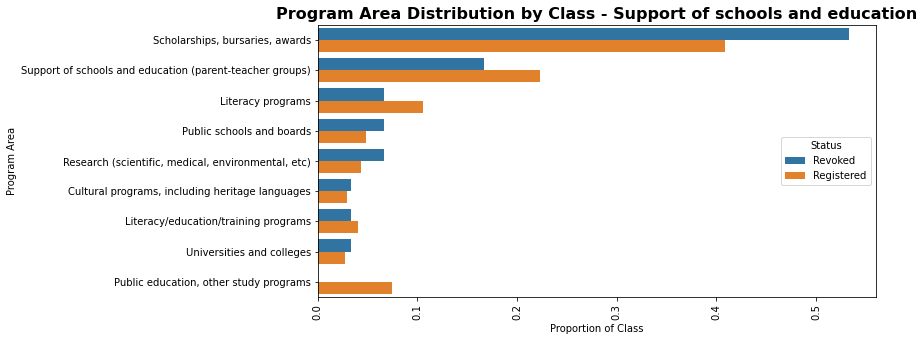

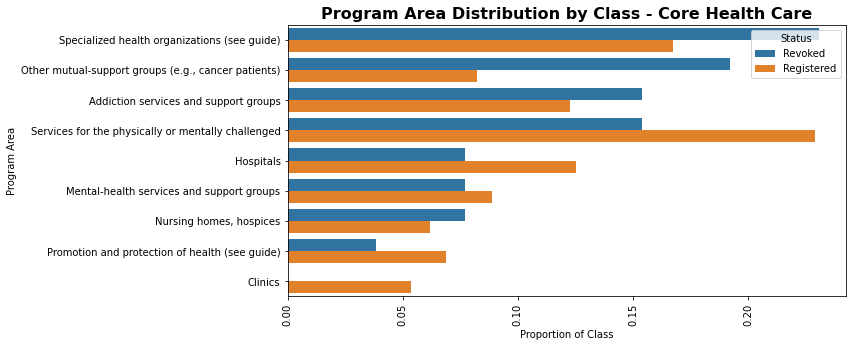

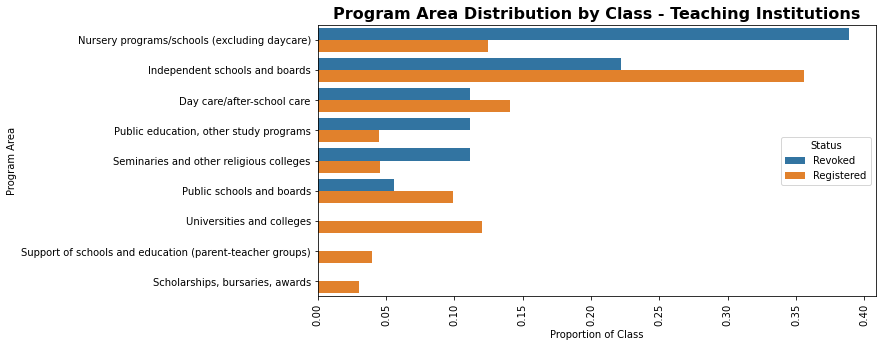

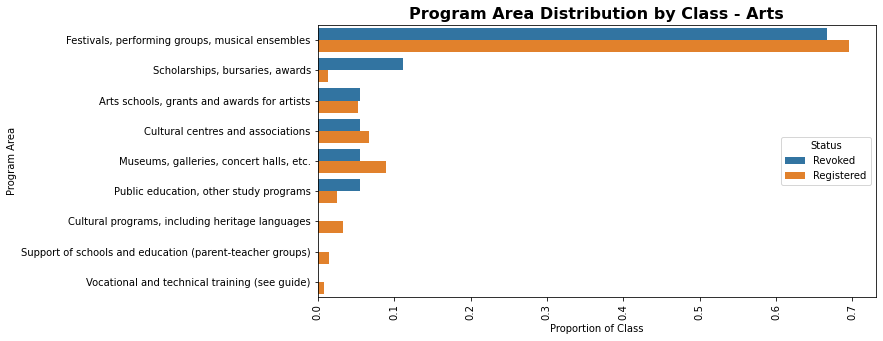

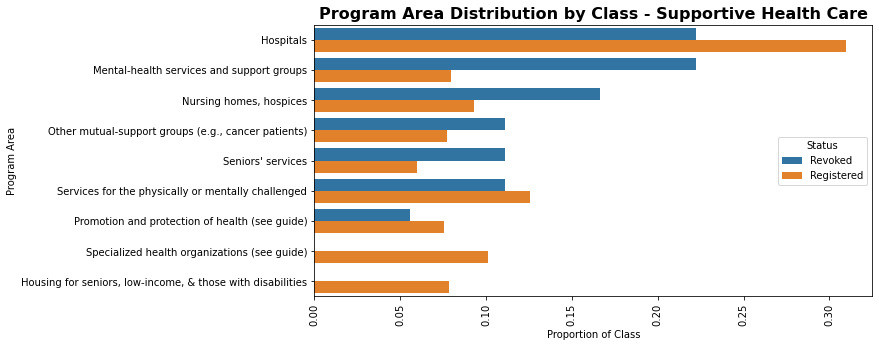

In [147]:
top_categories = df['Category'].value_counts(dropna=False)[:10].index.tolist()

for category in top_categories:
    cat_df = df.loc[df['Category']==category, :] #filter for category data
    cat_df = cat_df[cat_df['1200 Program Area']!='(Free-form text)'] #removing free-form text responses for easy comparison
    top_program_areas = cat_df['1200 Program Area'].value_counts(dropna=False)[:10].index.tolist()
    cat_df = cat_df.loc[cat_df['1200 Program Area'].isin(top_program_areas), :]
    
    plt.figure(figsize=[10,5])
    cat_df = cat_df.groupby(['Status','1200 Program Area'])['BN/Registration Number'].agg(['count'])
    cat_df['subcategory_perc'] = cat_df['count'] / (cat_df.groupby(level=0)['count'].transform('sum'))
    cat_df = cat_df['subcategory_perc'].reset_index().sort_values(['Status', 'subcategory_perc'], ascending=False)

    sns.barplot(x='subcategory_perc', y='1200 Program Area', hue='Status', data=cat_df)
    plt.xticks(rotation=90)
    plt.ylabel('Program Area')
    plt.xlabel('Proportion of Class')
    plt.title('Program Area Distribution by Class - {}'.format(category), fontsize = 16, fontweight='bold')
    plt.show();

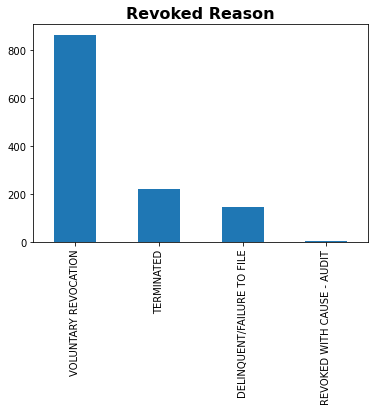

In [27]:
df.loc[df['Revoked Reason'].notnull(), 'Revoked Reason'].value_counts(dropna=False).plot(kind='bar')
plt.title('Revoked Reason', fontsize = 16, fontweight='bold')
plt.show()

## Financial Info

In [83]:
def removeOutliers(data, thresholdStd = 3):
    """
    This method returns all value indices which are farther away
    than thresholdStd standard deviationa
    """
    not_outliers = []
    mean = np.mean(data)
    std = np.std(data)
    if std == 0:
        return data
    
    for i, y in enumerate(data):
        z_score = (y - mean) / std
        if np.abs(z_score) <= thresholdStd:
            not_outliers.append(y)
    return not_outliers

### Revenue

In [72]:
#filter on revenue data
revenue_cols = [col for col in df.columns if '_perc_revenue' in col] + ['Status']
#make data from wide to long using category column
revenue_data = df[revenue_cols]

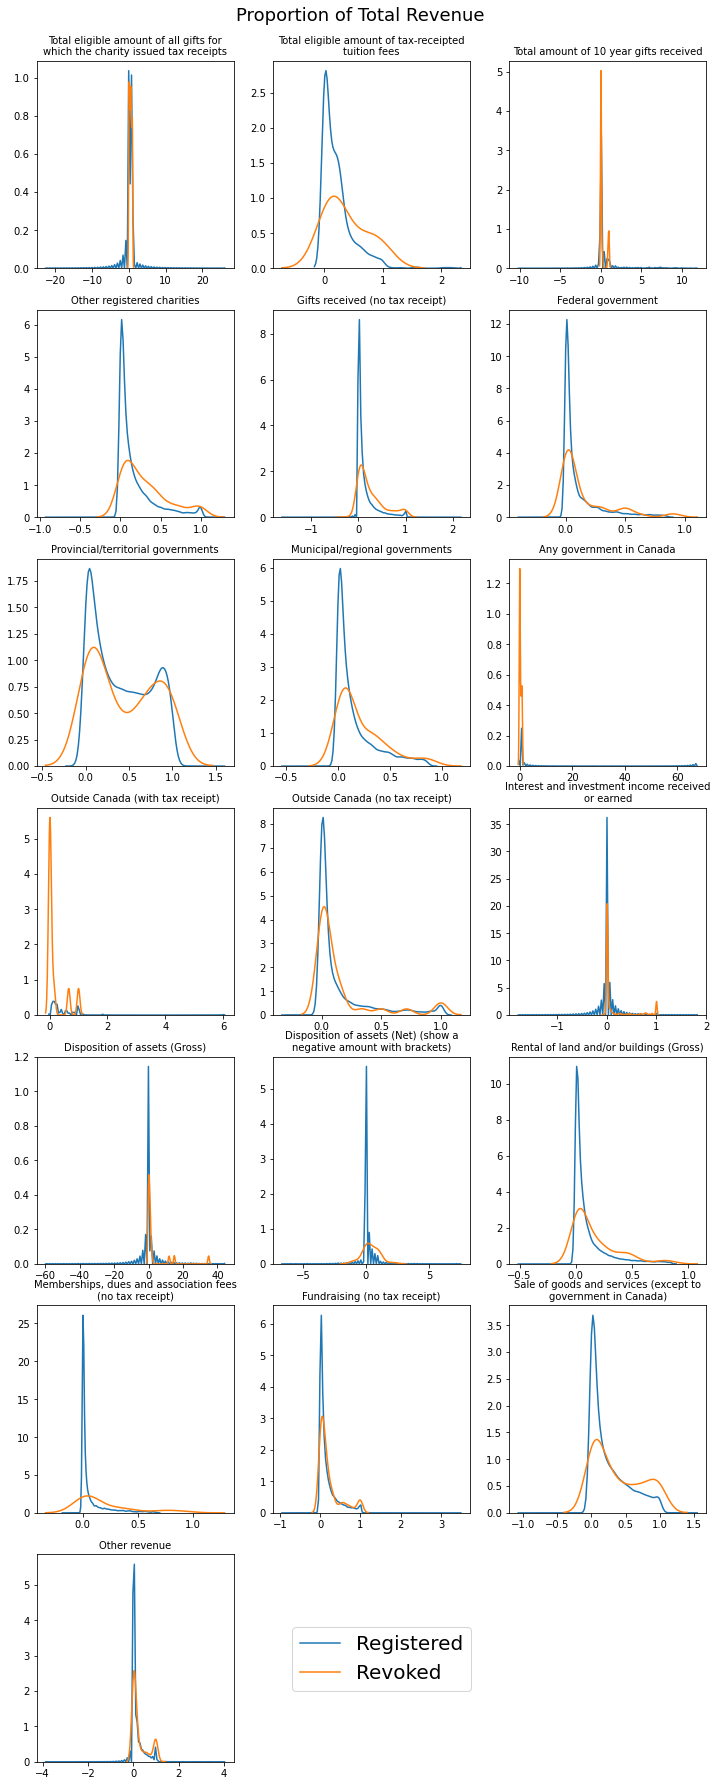

In [185]:
col_list = revenue_data.select_dtypes(include='number').columns
tot_plots = len(col_list)
num_cols = 3
num_rows = tot_plots // num_cols
num_rows += tot_plots % num_cols

position = range(1,tot_plots + 1)

plt.figure(figsize=[12,15])
fig = plt.figure(1)
plt.suptitle('Proportion of Total Revenue', x=.5,y=1.75, fontsize = 18)

for i, col in enumerate(col_list):
    ax = fig.add_subplot(num_rows, num_cols, position[i])
    for category in ['Registered', 'Revoked']:
        subdata = revenue_data.loc[revenue_data['Status']==category, col]
        subdata = removeOutliers(subdata)
        sns.kdeplot(data=subdata, ax=ax, label=category)
    if i != (len(col_list)-1):
        ax.get_legend().remove()
    else:
        ax.legend(loc='upper center', bbox_to_anchor=(1.75,0.7), prop={'size': 20})
    title = data_dic.loc[data_dic['column_name']==col.split('_')[0], 'description'].values[0]
    ax.set_title("\n".join(wrap(title,40)), fontsize=10)
    
plt.subplots_adjust(top=1.7)
plt.show()

In [153]:
#create pivot table for calculating mean value for each financial category and class
revenue_agg = pd.melt(revenue_data,id_vars=['Status'],var_name='category',value_name='perc_of_revenue') \
    .replace([np.inf, -np.inf], np.nan) \
    .groupby(['Status','category']).mean().reset_index() \
    .rename(columns={'perc_of_revenue':'avg_perc_revenue'})
#make barplot with category as x axis & avg perc as y axis

#create column with codes for merging with attribute description
revenue_agg['code'] = revenue_agg['category'].apply(lambda x: x.split('_')[0])

#bring in description for plotting
revenue_agg = pd.merge(revenue_agg, data_dic[['column_name', 'description']], left_on='code', right_on='column_name', how='left')

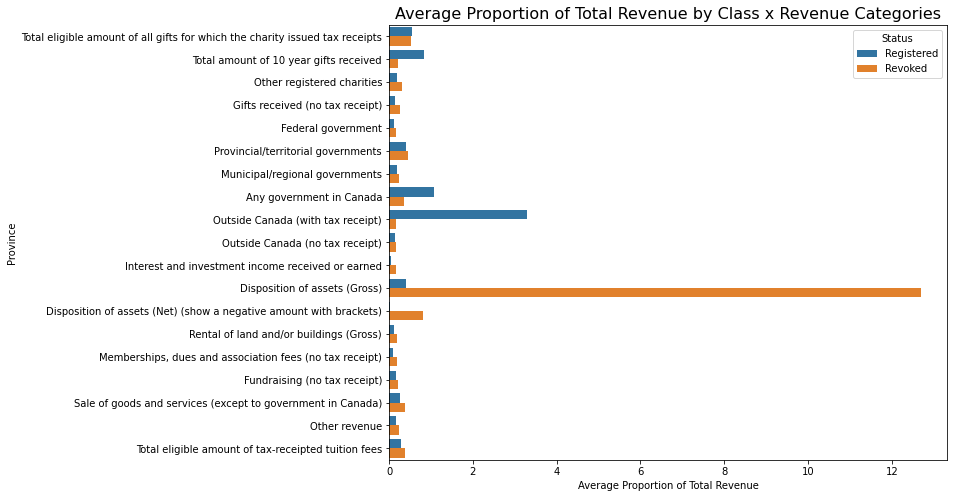

In [159]:
plt.figure(figsize=[10,8])

sns.barplot(x='avg_perc_revenue', y='description', hue='Status', data=revenue_agg)
plt.ylabel('Province')
plt.xlabel('Average Proportion of Total Revenue')
plt.title('Average Proportion of Total Revenue by Class x Revenue Categories', fontsize = 16)
plt.show();

## Expenditures

In [148]:
#filter on expenditure data
expenditures_cols = [col for col in df.columns if '_perc_expenditures' in col] + ['Status']
#make data from wide to long using category column
expenditures_data = df[expenditures_cols]

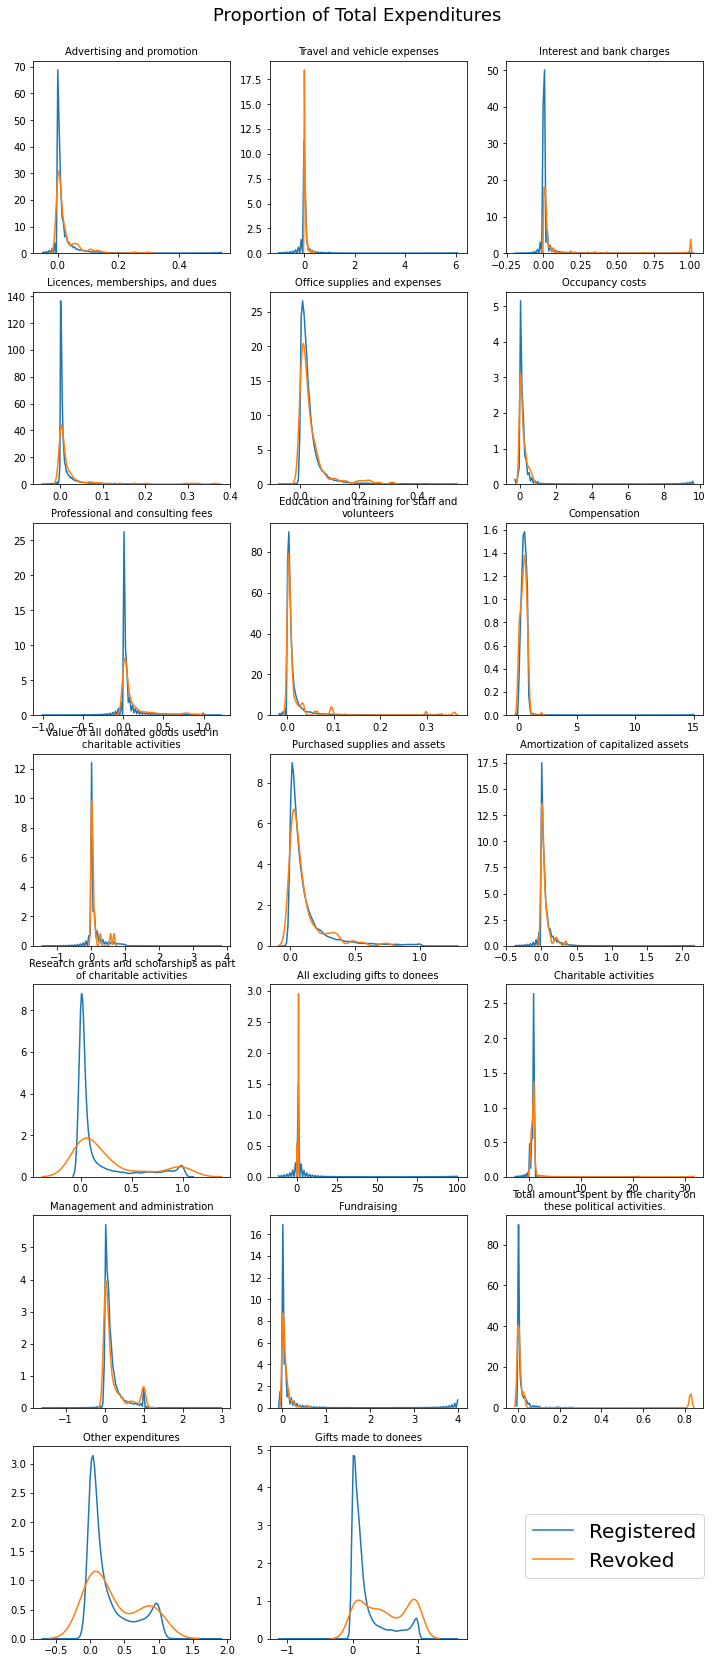

In [188]:
col_list = expenditures_data.select_dtypes(include='number').columns
tot_plots = len(col_list)
num_cols = 3
num_rows = tot_plots // num_cols
num_rows += tot_plots % num_cols

position = range(1,tot_plots + 1)

plt.figure(figsize=[12,15])
fig = plt.figure(1)
plt.suptitle('Proportion of Total Expenditures', x=.5,y=1.85, fontsize = 18)

for i, col in enumerate(col_list):
    ax = fig.add_subplot(num_rows, num_cols, position[i])
    for category in ['Registered', 'Revoked']:
        subdata = expenditures_data.loc[expenditures_data['Status']==category, col]
        subdata = removeOutliers(subdata)
        sns.kdeplot(data=subdata, ax=ax, label=category)
    if i != (len(col_list)-1):
        ax.get_legend().remove()
    else:
        ax.legend(loc='upper center', bbox_to_anchor=(1.75,0.7), prop={'size': 20})
    title = data_dic.loc[data_dic['column_name']==col.split('_')[0], 'description'].values[0]
    ax.set_title("\n".join(wrap(title,40)), fontsize=10)
    
plt.subplots_adjust(top=1.8)
plt.show()

In [158]:
#create pivot table for calculating mean value for each financial category and class
expenditures_agg = pd.melt(expenditures_data,id_vars=['Status'],var_name='category',value_name='perc_of_expenditures') \
    .replace([np.inf, -np.inf], np.nan) \
    .groupby(['Status','category']).mean().reset_index() \
    .rename(columns={'perc_of_expenditures':'avg_perc_expenditures'})
#make barplot with category as x axis & avg perc as y axis

#create column with codes for merging with attribute description
expenditures_agg['code'] = expenditures_agg['category'].apply(lambda x: x.split('_')[0])

#bring in description for plotting
expenditures_agg = pd.merge(expenditures_agg, data_dic[['column_name', 'description']], left_on='code', right_on='column_name', how='left')

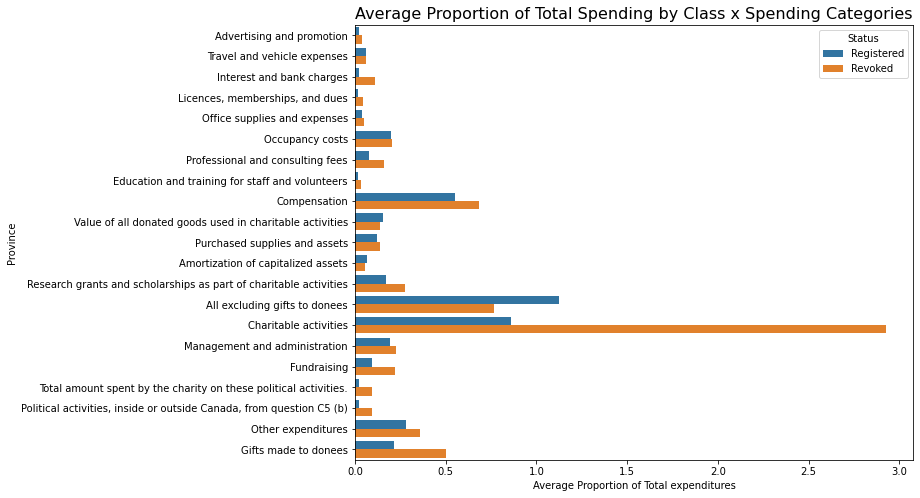

In [164]:
plt.figure(figsize=[10,8])

sns.barplot(x='avg_perc_expenditures', y='description', hue='Status', data=expenditures_agg)
plt.ylabel('Province')
plt.xlabel('Average Proportion of Total expenditures')
plt.title('Average Proportion of Total Spending by Class x Spending Categories', fontsize = 16)
plt.show();

## Feature Reduction

In [25]:
'''
#bivariate plotting

#regression between two variables
sns.set(font='DejaVu Sans')
sns.jointplot([x col], [y col], df, kind='reg').fig.suptitle('y col Regression', y=1.01)

sns.lmplot([x col], [y col], df, col='Status').fig.suptitle('y col Regression - categorized by Status', y=1.05)
'''

"\n#bivariate plotting\n\n#regression between two variables\nsns.set(font='DejaVu Sans')\nsns.jointplot([x col], [y col], df, kind='reg').fig.suptitle('y col Regression', y=1.01)\n\nsns.lmplot([x col], [y col], df, col='Status').fig.suptitle('y col Regression - categorized by Status', y=1.05)\n"